In [102]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from scikitplot.metrics import plot_roc_curve

#import warnings
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [104]:
df_train = pd.read_csv("credit_train.csv")
df_train.shape

(100514, 19)

In [105]:
df_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [8]:
# let's check unique values
columns=df_train.columns
for col in columns:
    print(col,':\n',df_train[col].unique())
    print(df_train[col].value_counts())
    print('\n',20*'**','\n')

Loan Status :
 ['Fully Paid' 'Charged Off' nan]
Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

 **************************************** 

Current Loan Amount :
 [  445412.   262328. 99999999. ...   100254.   274076.       nan]
99999999.0    11484
223102.0         27
223322.0         27
216194.0         27
223652.0         27
              ...  
72050.0           1
712228.0          1
125752.0          1
594902.0          1
274076.0          1
Name: Current Loan Amount, Length: 22004, dtype: int64

 **************************************** 

Term :
 ['Short Term' 'Long Term' nan]
Short Term    72208
Long Term     27792
Name: Term, dtype: int64

 **************************************** 

Credit Score :
 [ 709.   nan  741.  721. 7290.  730.  678.  739.  728.  740.  743.  727.
  723.  747.  687.  750.  714.  724.  704.  688.  749.  746.  737.  729.
  733.  725.  745.  720.  718.  682. 7120.  680.  710.  598.  719. 6610.
  652.  736. 7380.  644.  672. 7370.  69

0.0          572
67697.0       17
175978.0      17
65683.0       17
124013.0      16
            ... 
449654.0       1
543381.0       1
616987.0       1
1420744.0      1
850820.0       1
Name: Current Credit Balance, Length: 32730, dtype: int64

 **************************************** 

Maximum Open Credit :
 [ 416746.  850784.  750090. ... 1287792. 2299198.  892606.]
0.0          681
237204.0      13
246136.0      12
201652.0      12
155474.0      12
            ... 
876304.0       1
29128.0        1
1144396.0      1
280412.0       1
892606.0       1
Name: Maximum Open Credit, Length: 44596, dtype: int64

 **************************************** 

Bankruptcies :
 [ 1.  0.  2.  3. nan  5.  4.  7.  6.]
0.0    88774
1.0    10475
2.0      417
3.0       93
4.0       27
5.0        7
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

 **************************************** 

Tax Liens :
 [ 0.  1.  2.  4.  3.  6.  5. nan 11. 15.  9.  7. 10.]
0.0     98062
1.0      1343
2.0      

In [9]:
df_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


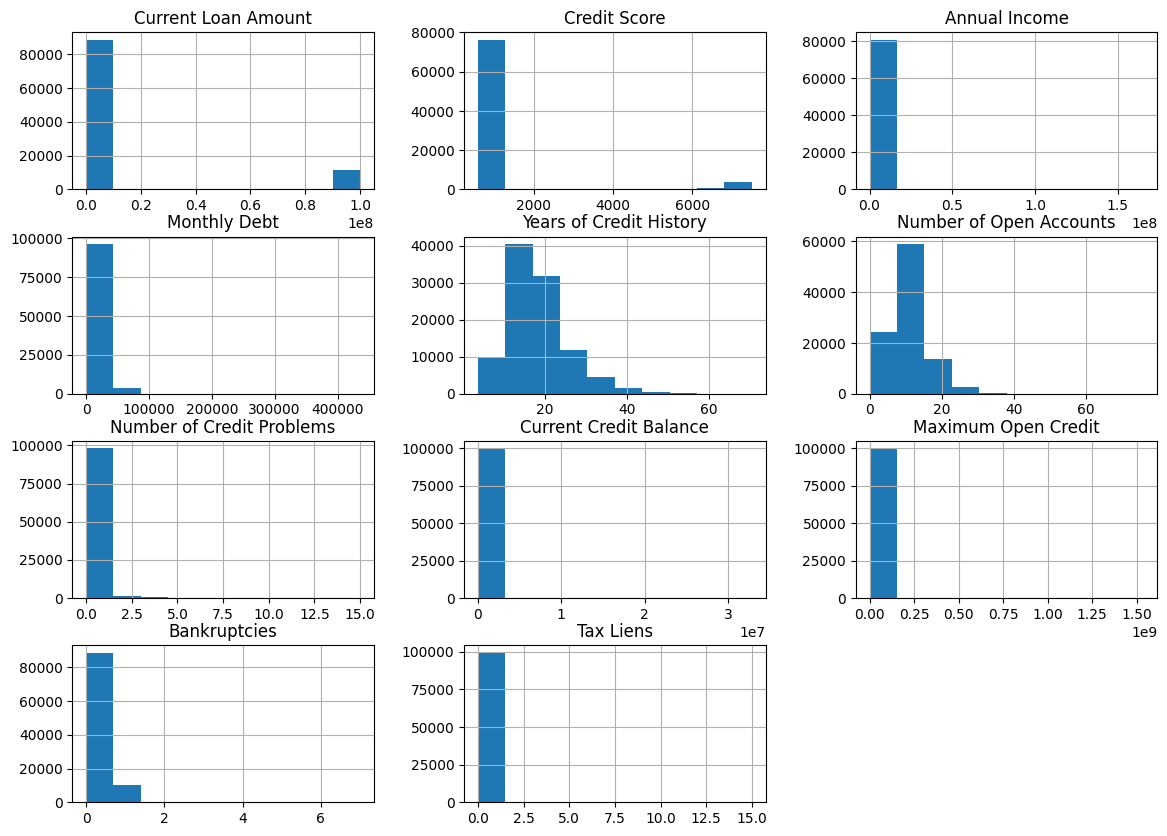

In [10]:
df_train.hist(bins = 10 , figsize= (14,10))
plt.show()

In [7]:
df_train.dtypes

Loan Status                   object
Current Loan Amount          float64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job          object
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts      float64
Number of Credit Problems    float64
Current Credit Balance       float64
Maximum Open Credit          float64
Bankruptcies                 float64
Tax Liens                    float64
dtype: object

### Visualize categorical variable

In [14]:
df_train['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

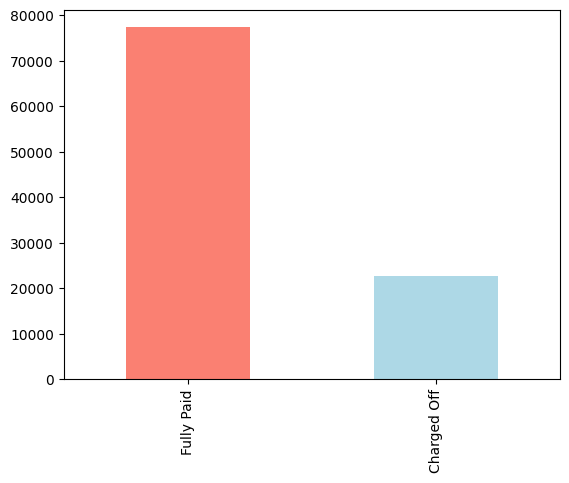

In [15]:
df_train["Loan Status"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

<Axes: ylabel='Loan Status'>

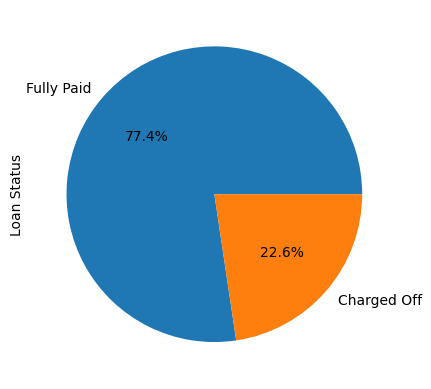

In [16]:
df_train['Loan Status'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [17]:
df_train['Term'].value_counts()

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

<Axes: ylabel='Term'>

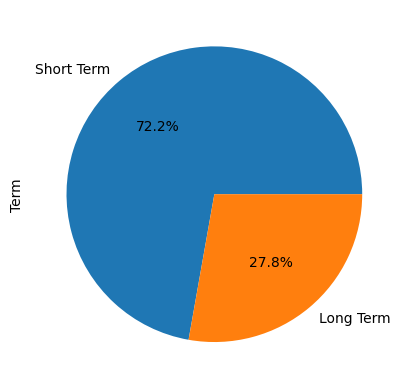

In [18]:
df_train['Term'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [19]:
df_train['Home Ownership'].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

<Axes: ylabel='Home Ownership'>

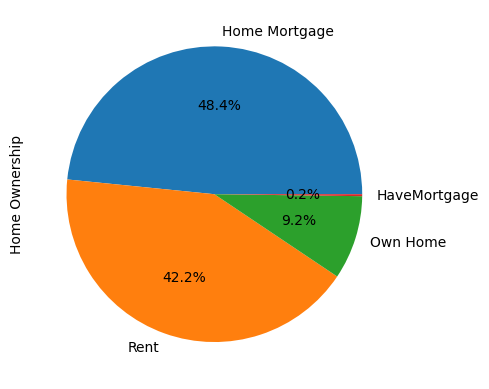

In [20]:
df_train['Home Ownership'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [21]:
df_train['Purpose'].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

Text(0.5, 0, 'Purpose')

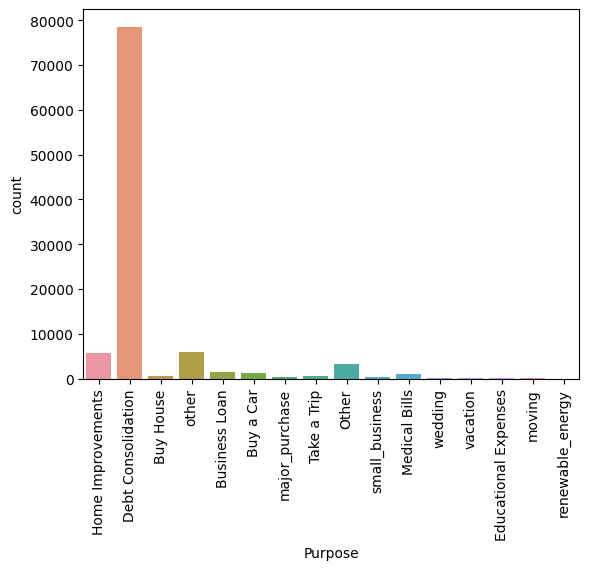

In [25]:
sns.countplot(x=df_train['Purpose'],data=df_train)
plt.xticks(rotation=90,fontsize=10,horizontalalignment='center')
plt.xlabel('Purpose')

In [24]:
df_train['Years in current job'].value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

Text(0.5, 0, 'Years in current job')

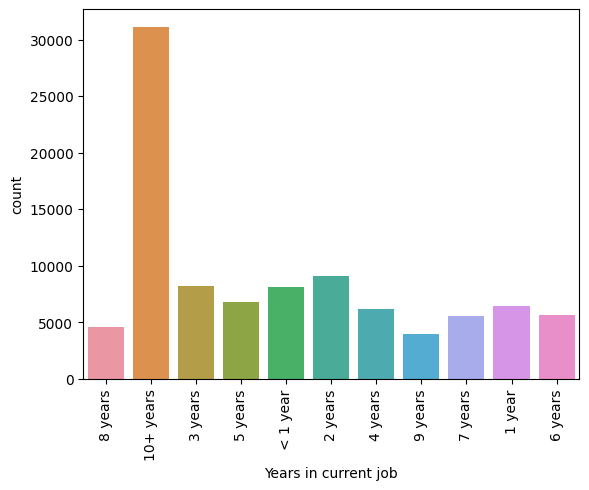

In [16]:
sns.countplot(x=df_train['Years in current job'],data=df_train)
plt.xticks(rotation=90,fontsize=10,horizontalalignment='center')
plt.xlabel('Years in current job')

### Visualize Numerical variable

In [37]:
df_train['Number of Credit Problems'].value_counts()

0.0     86035
1.0     12077
2.0      1299
3.0       378
4.0       125
5.0        49
6.0        17
7.0         8
8.0         4
11.0        2
10.0        2
9.0         2
15.0        1
12.0        1
Name: Number of Credit Problems, dtype: int64

Text(0.5, 0, 'Number of Credit Problems')

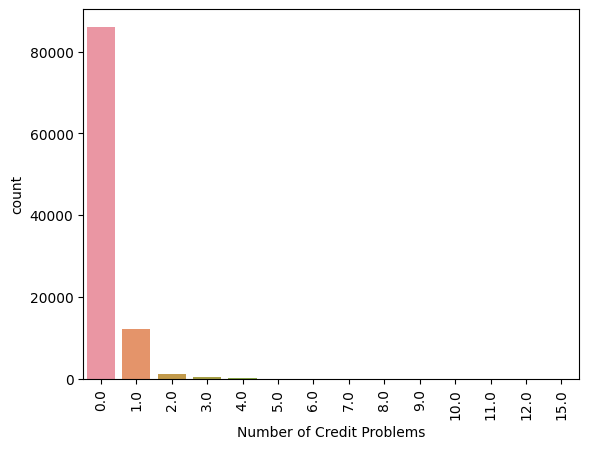

In [38]:
sns.countplot(x=df_train['Number of Credit Problems'],data=df_train)
plt.xticks(rotation=90,fontsize=10,horizontalalignment='center')
plt.xlabel('Number of Credit Problems')

In [41]:
df_train['Bankruptcies'].value_counts()

0.0    88774
1.0    10475
2.0      417
3.0       93
4.0       27
5.0        7
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

Text(0.5, 0, 'Bankruptcies')

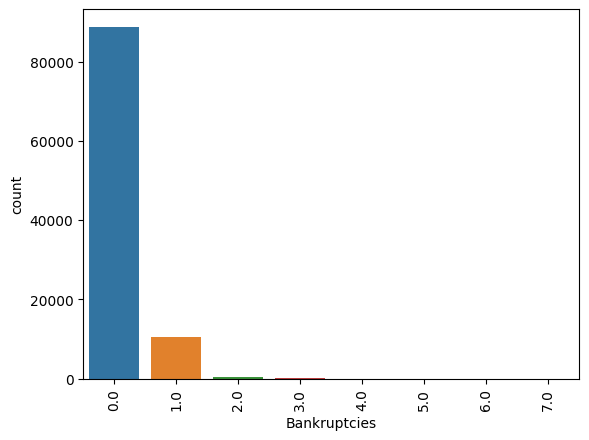

In [43]:
sns.countplot(x=df_train['Bankruptcies'],data=df_train)
plt.xticks(rotation=90,fontsize=10,horizontalalignment='center')
plt.xlabel('Bankruptcies')

In [44]:
df_train['Tax Liens'].value_counts()

0.0     98062
1.0      1343
2.0       374
3.0       111
4.0        58
5.0        16
6.0        12
7.0         7
9.0         3
11.0        2
15.0        1
10.0        1
Name: Tax Liens, dtype: int64

Text(0.5, 0, 'Tax Liens')

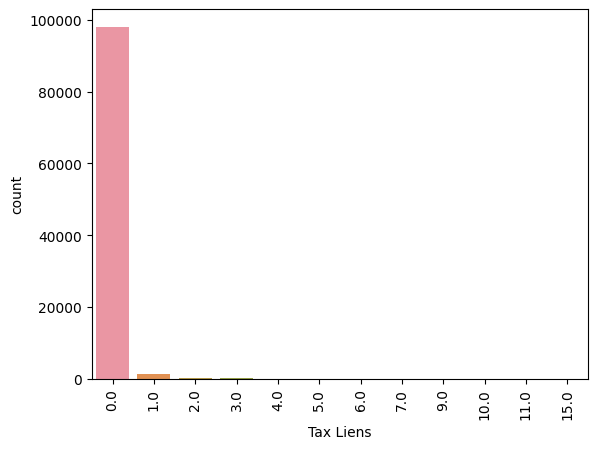

In [45]:
sns.countplot(x=df_train['Tax Liens'],data=df_train)
plt.xticks(rotation=90,fontsize=10,horizontalalignment='center')
plt.xlabel('Tax Liens')

In [46]:
df_train.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
Credit Score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
Annual Income,0.013112,-0.017078,1.000000,0.485230,0.161669,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
Monthly Debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
Years of Credit History,0.019282,-0.009720,0.161669,0.199289,1.000000,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
Number of Open Accounts,0.001478,0.006435,0.146175,0.411353,0.132349,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
Number of Credit Problems,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
Current Credit Balance,0.003880,-0.000104,0.312340,0.481348,0.208470,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
Maximum Open Credit,-0.001271,-0.002827,0.053064,0.039268,0.031124,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029
Bankruptcies,-0.000608,-0.006935,-0.047672,-0.078979,0.066247,-0.024575,0.752942,-0.122603,-0.014574,1.000000,0.046110


(11.5, -0.5)

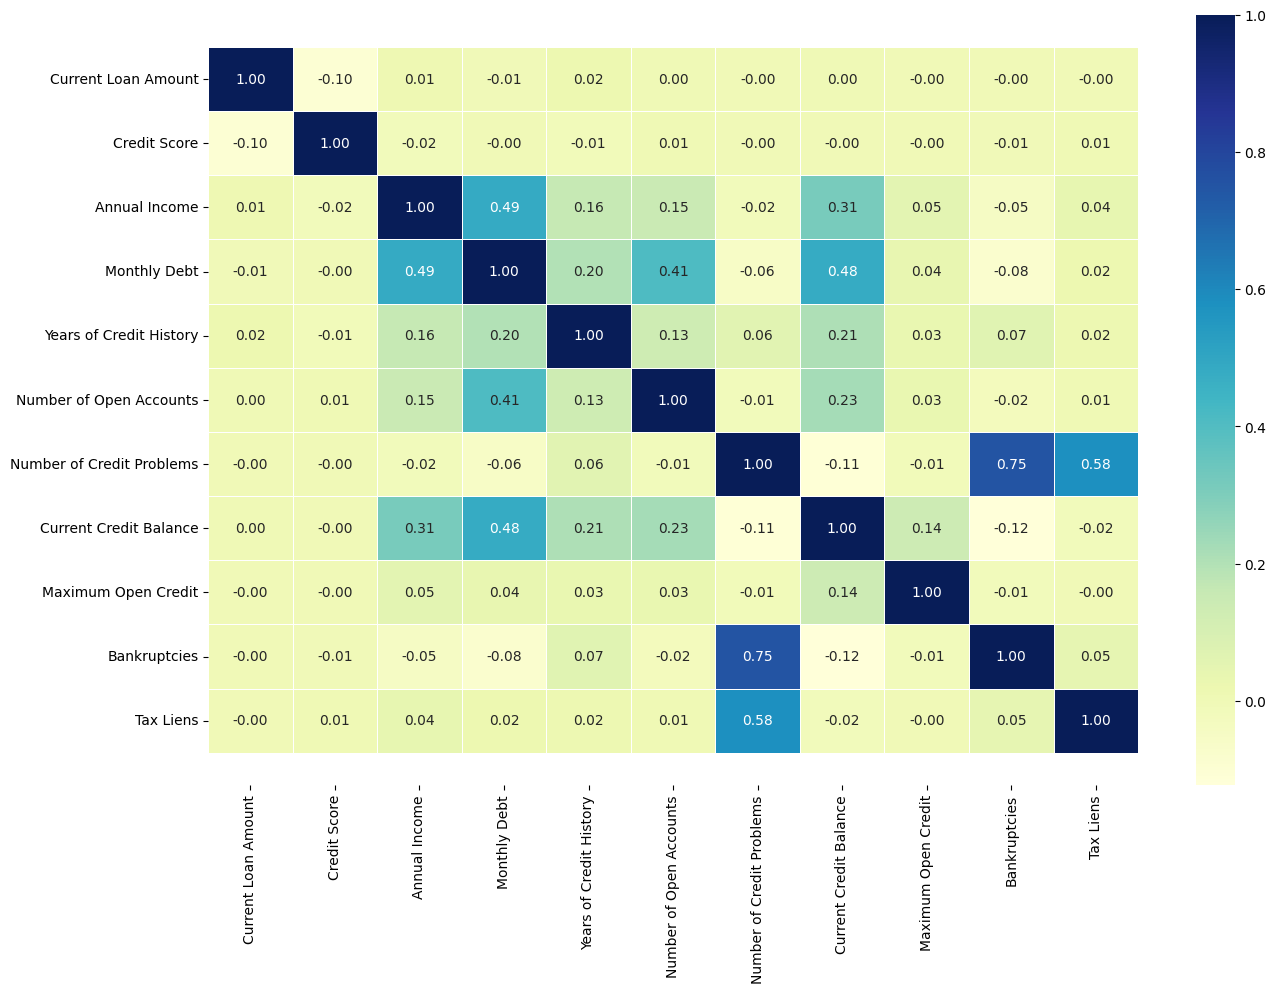

In [47]:
# Let's make our correlation matrix a little prettier
corr_matrix = df_train.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [106]:
df_train.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [107]:
df_train=df_train.drop(['Loan ID','Customer ID'],axis=1)

In [108]:
df_train.head().T

,0,1,2,3,4
Loan Status,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid
Current Loan Amount,445412.0,262328.0,99999999.0,347666.0,176220.0
Term,Short Term,Short Term,Short Term,Long Term,Short Term
Credit Score,709.0,NaN,741.0,721.0,NaN
Annual Income,1167493.0,NaN,2231892.0,806949.0,NaN
Years in current job,8 years,10+ years,8 years,3 years,5 years
Home Ownership,Home Mortgage,Home Mortgage,Own Home,Own Home,Rent
Purpose,Home Improvements,Debt Consolidation,Debt Consolidation,Debt Consolidation,Debt Consolidation
Monthly Debt,5214.74,33295.98,29200.53,8741.9,20639.7
Years of Credit History,17.2,21.1,14.9,12.0,6.1


In [109]:
# Find the columns which contain strings
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Loan Status
Term
Years in current job
Home Ownership
Purpose


In [110]:
# This will turn all of the string value into category values
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        df_train[label] = content.astype("category").cat.as_ordered()

In [111]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Loan Status                   100000 non-null  category
 1   Current Loan Amount           100000 non-null  float64 
 2   Term                          100000 non-null  category
 3   Credit Score                  80846 non-null   float64 
 4   Annual Income                 80846 non-null   float64 
 5   Years in current job          95778 non-null   category
 6   Home Ownership                100000 non-null  category
 7   Purpose                       100000 non-null  category
 8   Monthly Debt                  100000 non-null  float64 
 9   Years of Credit History       100000 non-null  float64 
 10  Months since last delinquent  46859 non-null   float64 
 11  Number of Open Accounts       100000 non-null  float64 
 12  Number of Credit Problems     

In [112]:
# Check missing data
df_train.isnull().sum()/len(df_train)

Loan Status                     0.005114
Current Loan Amount             0.005114
Term                            0.005114
Credit Score                    0.195674
Annual Income                   0.195674
Years in current job            0.047118
Home Ownership                  0.005114
Purpose                         0.005114
Monthly Debt                    0.005114
Years of Credit History         0.005114
Months since last delinquent    0.533806
Number of Open Accounts         0.005114
Number of Credit Problems       0.005114
Current Credit Balance          0.005114
Maximum Open Credit             0.005134
Bankruptcies                    0.007143
Tax Liens                       0.005213
dtype: float64

In [113]:
df_train.isna().sum()

Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [114]:
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Current Loan Amount
Credit Score
Annual Income
Monthly Debt
Years of Credit History
Months since last delinquent
Number of Open Accounts
Number of Credit Problems
Current Credit Balance
Maximum Open Credit
Bankruptcies
Tax Liens


In [115]:
# Check for which numeric columns have null values
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Current Loan Amount
Credit Score
Annual Income
Monthly Debt
Years of Credit History
Months since last delinquent
Number of Open Accounts
Number of Credit Problems
Current Credit Balance
Maximum Open Credit
Bankruptcies
Tax Liens


In [116]:
# Fill numeric rows with the median
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_train[label] = pd.isnull(content)
            # Fill missing numeric values with median
            df_train[label] = content.fillna(content.median())

In [117]:
# Check if there's any null numeric values
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [118]:
df_train.isna().sum()

Loan Status                      514
Current Loan Amount                0
Term                             514
Credit Score                       0
Annual Income                      0
Years in current job            4736
Home Ownership                   514
Purpose                          514
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent       0
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                       0
Tax Liens                          0
dtype: int64

In [119]:
# Check for columns which aren't numeric
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Loan Status
Term
Years in current job
Home Ownership
Purpose


In [120]:
# Turn categorical variables into numbers and fill missing
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_train[label] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_train[label] = pd.Categorical(content).codes+1

In [121]:
df_train.isna().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [123]:
df_train.dtypes

Loan Status                        int8
Current Loan Amount             float64
Term                               int8
Credit Score                    float64
Annual Income                   float64
Years in current job               int8
Home Ownership                     int8
Purpose                            int8
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

### Modelling

In [124]:
# Split data into X and y
X = df_train.drop("Loan Status", axis=1)

y = df_train["Loan Status"]

In [125]:
X

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,2,709.0,1167493.0,9,2,6,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,2,724.0,1174162.0,2,2,4,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,2,741.0,2231892.0,9,3,4,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,1,721.0,806949.0,4,3,4,8741.90,12.0,32.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,2,724.0,1174162.0,6,4,4,20639.70,6.1,32.0,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,312246.0,0,724.0,1174162.0,0,0,0,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,0.0,0.0
100510,312246.0,0,724.0,1174162.0,0,0,0,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,0.0,0.0
100511,312246.0,0,724.0,1174162.0,0,0,0,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,0.0,0.0
100512,312246.0,0,724.0,1174162.0,0,0,0,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,0.0,0.0


In [126]:
y

0         2
1         2
2         2
3         2
4         2
         ..
100509    0
100510    0
100511    0
100512    0
100513    0
Name: Loan Status, Length: 100514, dtype: int8

In [127]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_val, y_train, y_val = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [129]:
# Put models in a dictionary
models = {"XGboost":XGBClassifier(), 
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_val, y_val)
    return model_scores

In [130]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_val=X_val,
                             y_train=y_train,
                             y_val=y_val)

model_scores

{'XGboost': 0.8181365965278814, 'Random Forest': 0.8196289111077949}

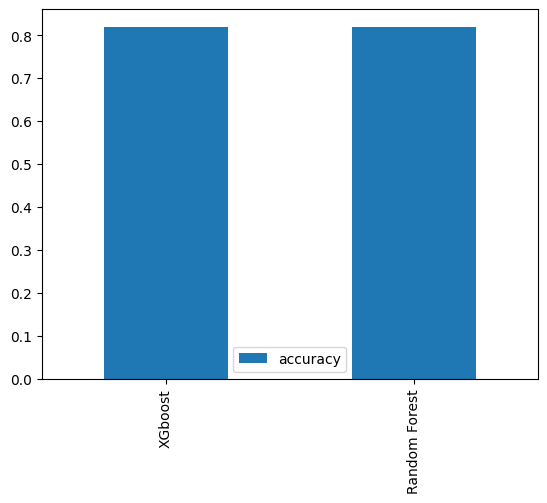

In [131]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();